In [2]:
import warnings
import itertools 
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from io import StringIO
import requests


df = pd.read_csv('p5.csv')
df.dropna(axis=1,inplace=True)
dates = pd.date_range(start='2010-01-01', freq='MS', periods=len(df))
y=df
y



C:\Users\Arpit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Postal District,P5
0,10-Jan,218.38
1,10-Feb,187.07
2,10-Mar,201.23
3,10-Apr,219.55
4,10-May,214.70
5,10-Jun,193.13
6,10-Jul,229.12
7,10-Aug,151.00
8,10-Sep,220.37
9,10-Oct,236.03


In [3]:
import calendar
df['Month'] = dates.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Year'] = dates.year

df.rename(columns={'Water used': 'P5'}, inplace=True)
df = df[['Month', 'Year', 'P5']]
df.set_index(dates, inplace=True)
df.head(5)
#showing first five values in segregated month and year
                   

,Month,Year,P5
2010-01-01,Jan,2010,218.38
2010-02-01,Feb,2010,187.07
2010-03-01,Mar,2010,201.23
2010-04-01,Apr,2010,219.55
2010-05-01,May,2010,214.70


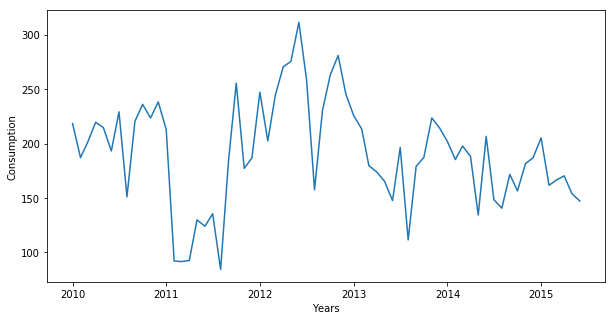

In [4]:
predict = df['P5']
plt.figure(figsize=(10, 5))
plt.plot(predict)
plt.xlabel('Years')
plt.ylabel('Consumption')
plt.show()

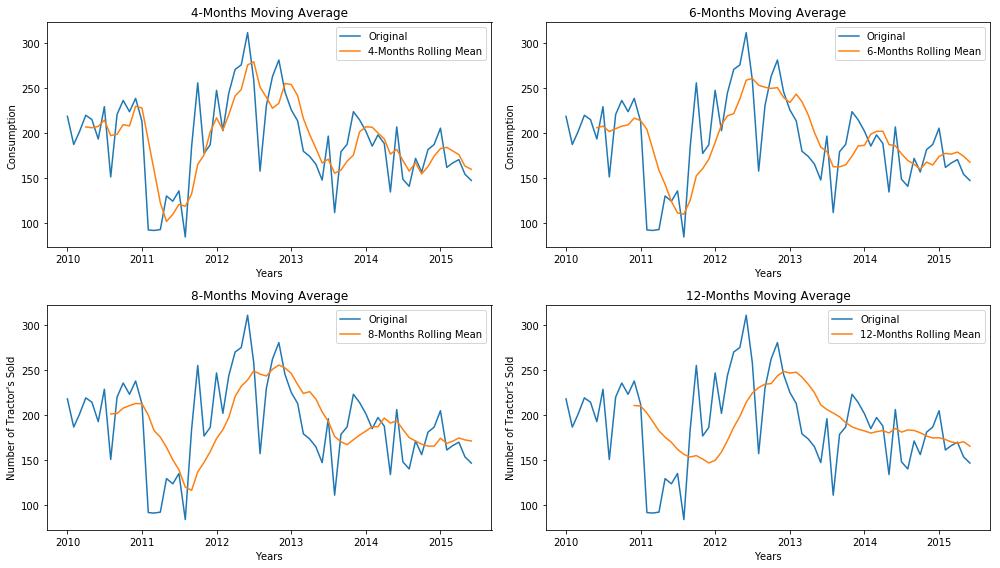

In [5]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(predict.index, predict, label='Original')
axes[0][0].plot(predict.index, predict.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Consumption")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(predict.index, predict, label='Original')
axes[0][1].plot(predict.index, predict.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Consumption")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(predict.index, predict, label='Original')
axes[1][0].plot(predict.index, predict.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(predict.index, predict, label='Original')
axes[1][1].plot(predict.index, predict.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

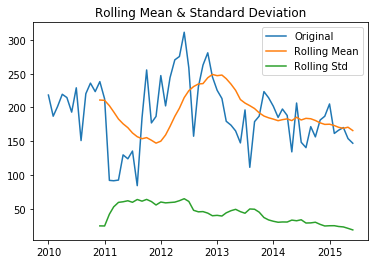

In [6]:
#Determing rolling statistics
rolmean = predict.rolling(window=12).mean()
rolstd = predict.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(predict, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

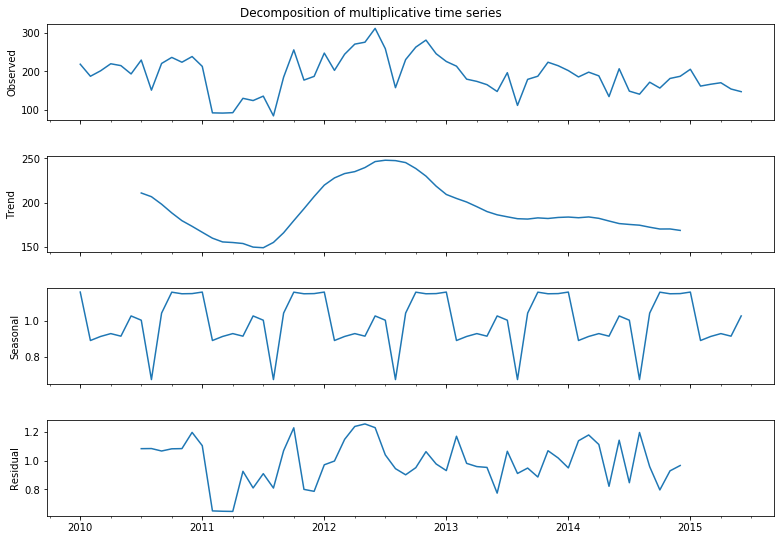

In [7]:
decomposition = sm.tsa.seasonal_decompose(predict, model='multiplicative')
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [8]:
#ARIMA initiated


# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [9]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
                                                  

Best SARIMAXNonexNone12 model - AIC:inf


In [9]:
blog_param_order = (1, 1, 1)
blog_param_seasonal_order = (1, 1, 1, 12)
blog_model = sm.tsa.statespace.SARIMAX(predict,
                                      order=blog_param_order,
                                      seasonal_order=blog_param_seasonal_order,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
blog_results = blog_model.fit()
print("SARIMAX{}x{}12 model - AIC:{}".format(blog_param_order, blog_param_seasonal_order, blog_results.aic))
#most suitable parameters                 

SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 model - AIC:400.65334782222317


In [10]:
best_model = sm.tsa.statespace.SARIMAX(predict,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

#ARIMA resultant table

                                 Statespace Model Results                                 
Dep. Variable:                                 P5   No. Observations:                   66
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -195.327
Date:                            Thu, 22 Mar 2018   AIC                            400.653
Time:                                    11:46:51   BIC                            411.602
Sample:                                01-01-2010   HQIC                           404.980
                                     - 06-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1530      0.336      0.456      0.649      -0.505       0.811
ma.L1         -0.6717      0.232   

In [11]:
# Get forecast 6 months ahead in future
n_steps = 6
pred_uc_99 = best_results.get_forecast(steps=6, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=6, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [12]:
n_steps = 6
idx = pd.date_range(predict.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head(5) #showing next 6 values

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2015-06-01,4.006165e+156,5.222332e+85,3.073217e+227,5.222332e+85,3.073217e+227
2015-07-01,1.309749e+101,2.820186e+22,6.082728e+179,2.820186e+22,6.082728e+179
2015-08-01,1.775235e+155,3.820957e+71,8.247825e+238,3.820957e+71,8.247825e+238
2015-09-01,3.100689e+155,2.399851e+67,4.006194e+243,2.399851e+67,4.006194e+243
2015-10-01,4.745334e+186,2.364477e+94,9.523543e+278,2.364477e+94,9.523543e+278


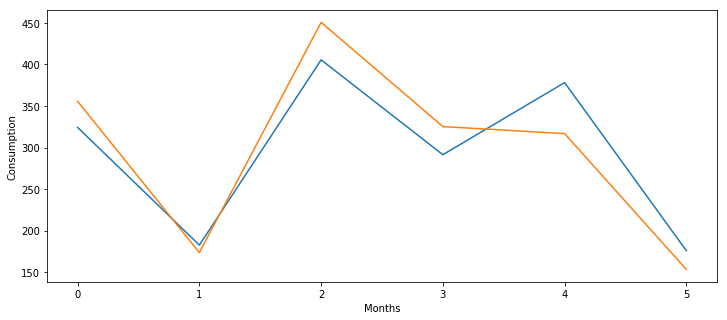

In [13]:
d = pd.read_csv('p55.csv')
dd = pd.read_csv('r5.csv')
predict = d['P5']
predictt = dd['P5']
plt.figure(figsize=(12, 5))
plt.plot(predict)
dff = pd.read_csv('p55.csv')
dff.dropna(axis=1,inplace=True)
dates = pd.date_range(start='2010-01-01', freq='MS', periods=len(dff))
plt.plot(predictt)
plt.xlabel('Months')
plt.ylabel('Consumption')
plt.show()
dff = pd.read_csv('p55.csv')
dff.dropna(axis=1,inplace=True)
dates = pd.date_range(start='2010-01-01', freq='MS', periods=len(dff))


#Resultant graph showing prediction

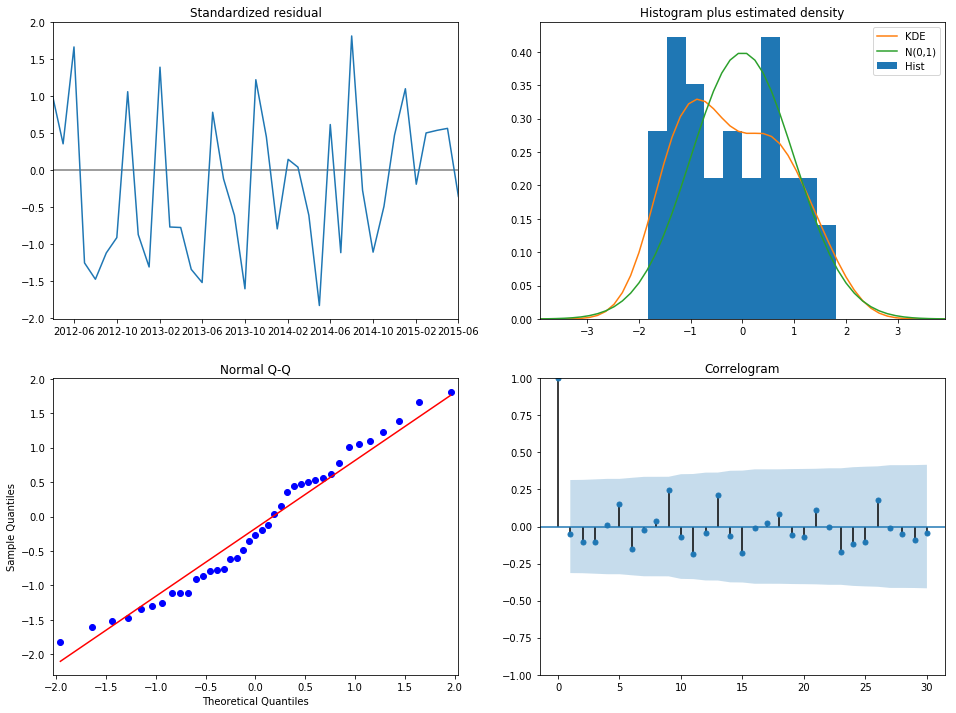

In [14]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()


In [15]:
#ARIMA ENDS

In [15]:
ar=d['P5']
#forecasted values
arr=dd['P5']
#original values
ar


0    324.17
1    182.56
2    405.50
3    291.34
4    378.12
5    175.78
Name: P5, dtype: float64

In [16]:
err = arr-ar #original-predicted
abs(err)
#error values of predicted 6 months

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(arr, ar)
rmse = sqrt(mse)/100
print('MSE: %f' % rmse)

MSE: 0.376883


In [ ]:
#end